In [9]:
import pandas as pd
import xgboost as xgb
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.table import Table
from sklearn.model_selection import train_test_split
import sklearn
import time
import matplotlib
import lightgbm
import catboost
import seaborn as sns

In [2]:
start = time.time()
    
#Load data:
cat = Table.read('./cosmos2020cat/galaxies_flag.fits', format='fits', hdu=1)
data = cat.to_pandas()
data = data.dropna()

total_time = (time.time() - start)
print(f'Total needed time for loading data: {total_time/60} minutes')

Total needed time for loading data: 0.05649308363596598 minutes


# Redshift

In [3]:
#Group columns into features (x) and labels (y), with their errors:
y = data[['lp_zBEST', 'lp_age', 'lp_dust', 'lp_mass_best', 'lp_SFR_best']].copy()
x = data[['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()
x_err = data[['HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()

#Train validation test split:
x_train, x_testval, y_train, y_testval, x_err_train, x_err_testval = train_test_split(x, y, x_err, test_size=0.3, shuffle = True)
x_test, x_val, y_test, y_val , x_err_test, x_err_val = train_test_split(x_testval, y_testval, x_err_testval, test_size=0.5, shuffle = True)

In [4]:
y_train = y_train['lp_zBEST'] + 1 # Only redshifts for now, but 1+z.
y_val = y_val['lp_zBEST'] + 1
y_test = y_test['lp_zBEST'] + 1

In [5]:
start = time.time()
def metric_scores_rgr(x,y):
    """Computes the NMAD, bias, outlier fraction for the regression tasks
    x: ground-truth data
    y: predicted data
    """
    met = np.abs(pd.Series(y-x))
    f_out = met/(1+x.astype(np.float32))
    nmad=1.48*np.median(f_out)
    bias = np.median(f_out)
    y_outlier = pd.Series(np.where(f_out > 0.15, 'outlier', 'not outlier'))
    r2 = sklearn.metrics.r2_score(x, y)
    #print("Outliers: \n", y_outlier.value_counts())
    outlier_fraction = y_outlier.value_counts()['outlier'] / len(y_outlier)
    #print("Outlier fraction: \n", outlier_fraction)
    #print("\n Bias: \n", bias)
    #print("\n NMAD score: \n", nmad)
    #print('\n R2 Test: \n', r2)
    return outlier_fraction, nmad, bias, r2

metrics = {'n_estimators': [], 'max_depth': [], 'outlier_fraction': [], 'NMAD': [], 'bias': [], 'r2': []}
metrics = pd.DataFrame(data=metrics)
for i in [50, 100, 150]:
    for j in [0, 4, 7, 9]:
        metrics['n_estimators']
        model = catboost.CatBoostRegressor(n_estimators = i, max_depth = j, verbose = 0)
        model.fit(x_train, y_train) # sample_weight = x_err_train
        pred_z = model.predict(x_val)
        # Tests for metric tuning:
        outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_val, pred_z)
        new_row = pd.DataFrame([[i, j, outlier_fraction, nmad, bias, r2]], columns=['n_estimators', 'max_depth', 'outlier_fraction', 'NMAD', 'bias', 'r2'])
        metrics = pd.concat([metrics, new_row], axis = 0)
        
print(metrics)

total_time = (time.time() - start)
print(f'Total needed time for catboost: {total_time/60} minutes')

   n_estimators  max_depth  outlier_fraction      NMAD      bias        r2
0          50.0        0.0          0.692605  0.366261  0.247474 -0.000038
0          50.0        4.0          0.414989  0.172154  0.116320  0.427174
0          50.0        7.0          0.378242  0.152095  0.102767  0.464477
0          50.0        9.0          0.365805  0.144881  0.097892  0.469444
0         100.0        0.0          0.692605  0.366261  0.247474 -0.000038
0         100.0        4.0          0.385840  0.156736  0.105903  0.454929
0         100.0        7.0          0.358046  0.141217  0.095417  0.479787
0         100.0        9.0          0.349013  0.135286  0.091410  0.476601
0         150.0        0.0          0.692605  0.366261  0.247474 -0.000038
0         150.0        4.0          0.381807  0.155118  0.104810  0.467473
0         150.0        7.0          0.351610  0.135669  0.091668  0.483624
0         150.0        9.0          0.339447  0.130501  0.088176  0.478924
Total needed time for cat

Outlier fraction: 
 0.34383468834688347

 Bias: 
 0.08845825652094641

 NMAD score: 
 0.13091821965100067

 R2 Test: 
 0.47473052311715647


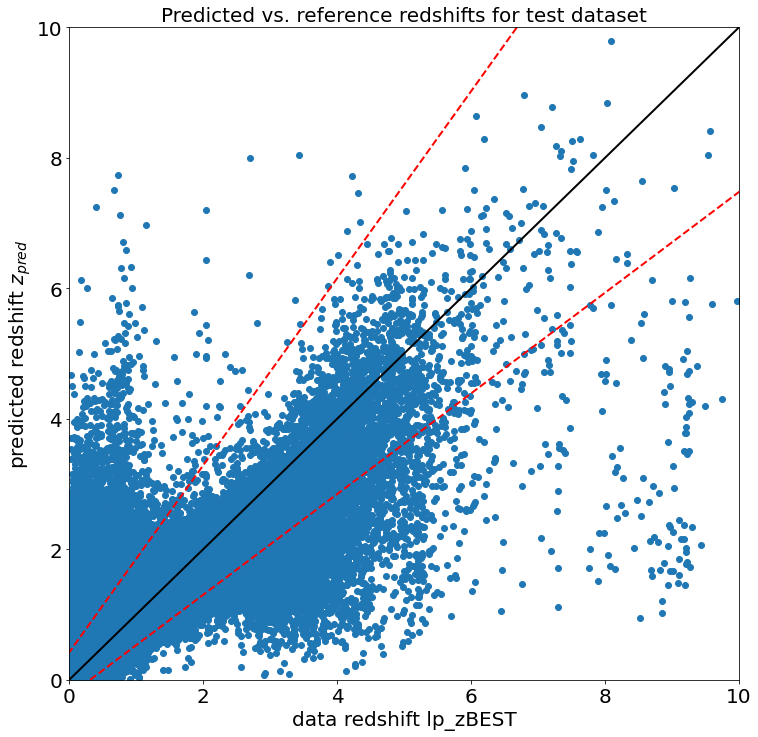

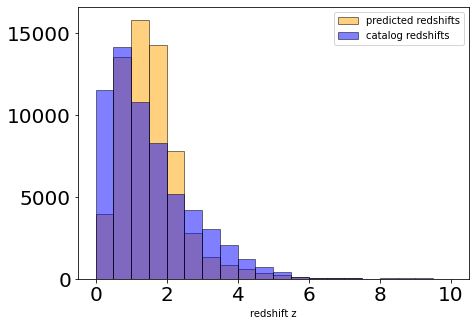

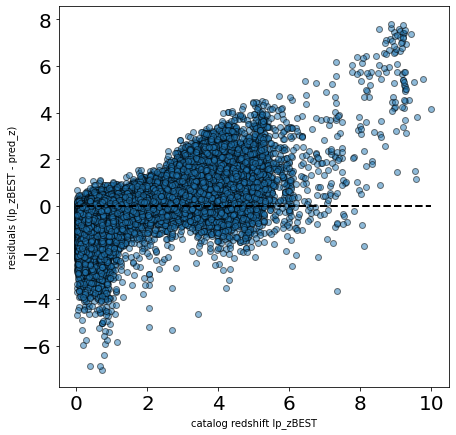

In [10]:
#Test:

model = catboost.CatBoostRegressor(n_estimators = 150, max_depth = 9, verbose = 0)
model.fit(x_train, y_train) # sample_weight = x_err_train
pred_z = model.predict(x_test)
#Metrics:
outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_test, pred_z)
print("Outlier fraction: \n", outlier_fraction)
print("\n Bias: \n", bias)
print("\n NMAD score: \n", nmad)
print('\n R2 Test: \n', r2)

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.scatter(y_test-1, pred_z-1)
plt.title('Predicted vs. reference redshifts for test dataset', fontsize = 20)
plt.xlabel('data redshift lp_zBEST', fontsize = 20)
plt.ylabel('predicted redshift $z_{pred}$', fontsize = 20)
plt.xlim(0,10)
plt.ylim(0,10)
x0, x1 = 0, 10
y0, y1 = 0, 10
plt.plot([np.min(y_test-1)-0.3*(1+np.min(y_test-1)), np.max(y_test-1)-0.30*(np.max(y_test-1)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([np.min(y_test-1)+0.3*(1+np.min(y_test-1)), np.max(y_test-1)+0.30*(np.max(y_test-1)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2)


# Histogram:
fig_hist = plt.figure(figsize=(7,5))
plt.hist(pred_z-1, 20, range = (0,10),facecolor='orange', edgecolor = 'black', alpha=0.5, label = 'predicted redshifts')
plt.hist(y_test-1, 20, range = (0,10), facecolor='blue', edgecolor = 'black', alpha=0.5, label = 'catalog redshifts')
plt.xlabel('redshift z')
plt.legend()
# Residuals:
residuals = y_test - pred_z
fig_res = plt.figure(figsize=(7,7))
plt.scatter(y_test-1, residuals, alpha = 0.5, edgecolor = 'black')
plt.xlabel('catalog redshift lp_zBEST')
plt.ylabel('residuals (lp_zBEST - pred_z)')
x0, x1 = 0, 10
y0, y1 = 0, 0
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2, linestyle = 'dashed')

In [ ]:
# Feature importance:
def plot_feature_importance(importance,names,model_type):
    """Plots feature importance
    importance: features importance output from model
    names: features names
    model_type: name of the model used to compute features importance
    """

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

features_importances = model.feature_importances_ #replace model by your model
names = np.array(['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3'])#list of the columns from the X_train data set
model_type = 'CatBoost' # change according to the model to be used. Only used in the plots.

plot_feature_importance(features_importances,names,model_type)

# Age:

In [11]:
#Group columns into features (x) and labels (y), with their errors:
y = data[['lp_zBEST', 'lp_age', 'lp_dust', 'lp_mass_best', 'lp_SFR_best']].copy()
x = data[['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()
y_z_err = data[['lp_chi2_best']].copy()
x_err = data[['HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()

#Train validation test split:
x_train, x_testval, y_train, y_testval, x_err_train, x_err_testval = train_test_split(x, y, x_err, test_size=0.3, shuffle = True)
x_test, x_val, y_test, y_val , x_err_test, x_err_val = train_test_split(x_testval, y_testval, x_err_testval, test_size=0.5, shuffle = True)

In [12]:
y_train = y_train['lp_age'] #Ages
y_val = y_val['lp_age']
y_test = y_test['lp_age']

In [13]:
start = time.time()

def metric_scores_rgr(x,y):
    """Computes the NMAD, bias, outlier fraction for the regression tasks
    x: ground-truth data
    y: predicted data
    """
    met = np.abs(pd.Series(y-x))
    f_out = met/(1+x.astype(np.float32))
    nmad=1.48*np.median(f_out)
    bias = np.median(f_out)
    y_outlier = pd.Series(np.where(f_out > 0.30, 'outlier', 'not outlier'))
    r2 = sklearn.metrics.r2_score(x, y)
    #print("Outliers: \n", y_outlier.value_counts())
    outlier_fraction = y_outlier.value_counts()['outlier'] / len(y_outlier)
    #print("Outlier fraction: \n", outlier_fraction)
    #print("\n Bias: \n", bias)
    #print("\n NMAD score: \n", nmad)
    #print('\n R2 Test: \n', r2)
    return outlier_fraction, nmad, bias, r2

metrics = {'n_estimators': [], 'max_depth': [], 'outlier_fraction': [], 'NMAD': [], 'bias': [], 'r2': []}
metrics = pd.DataFrame(data=metrics)
for i in [50, 100, 150]:
    for j in [0, 4, 7, 9]:
        metrics['n_estimators']
        model = catboost.CatBoostRegressor(n_estimators = i, max_depth = j, verbose = 0)
        model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
        pred_z = model.predict(x_val)
        # Tests for metric tuning:
        outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_val, pred_z)
        new_row = pd.DataFrame([[i, j, outlier_fraction, nmad, bias, r2]], columns=['n_estimators', 'max_depth', 'outlier_fraction', 'NMAD', 'bias', 'r2'])
        metrics = pd.concat([metrics, new_row], axis = 0)
        
print(metrics)

total_time = (time.time() - start)
print(f'Total needed time for catboost: {total_time/60} minutes')

   n_estimators  max_depth  outlier_fraction      NMAD      bias        r2
0          50.0        0.0          0.854110  1.619451  1.094224 -0.002920
0          50.0        4.0          0.802958  1.113065  0.752071  0.238159
0          50.0        7.0          0.792635  1.077061  0.727744  0.268360
0          50.0        9.0          0.791328  1.069294  0.722496  0.279354
0         100.0        0.0          0.854110  1.619451  1.094224 -0.002920
0         100.0        4.0          0.799071  1.089449  0.736114  0.257335
0         100.0        7.0          0.788957  1.063513  0.718590  0.281181
0         100.0        9.0          0.788505  1.064759  0.719432  0.281127
0         150.0        0.0          0.854110  1.619451  1.094224 -0.002920
0         150.0        4.0          0.795683  1.083326  0.731977  0.265042
0         150.0        7.0          0.789037  1.059178  0.715661  0.285840
0         150.0        9.0          0.788763  1.064422  0.719204  0.280170
Total needed time for cat

Outlier fraction: 
 0.7902309975480707

 Bias: 
 0.7220026936522519

 NMAD score: 
 1.0685639866053327

 R2 Test: 
 0.27912891591694533


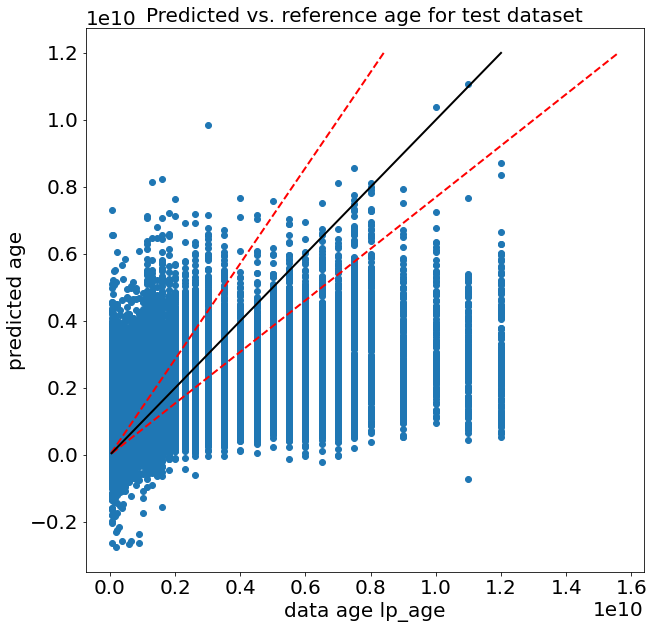

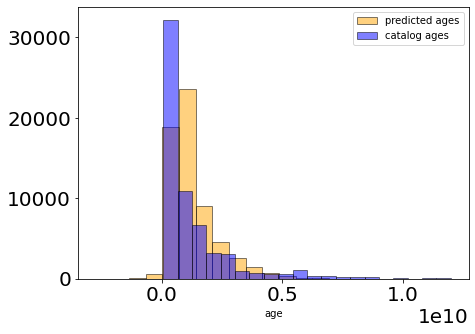

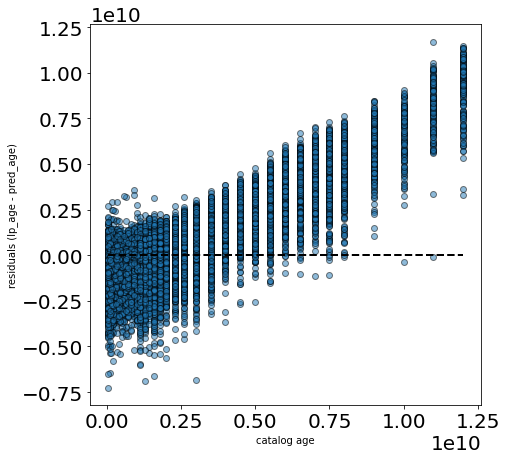

In [14]:
#Test:

model = catboost.CatBoostRegressor(n_estimators = 150, max_depth = 9, verbose = 0)
model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
pred_z = model.predict(x_test)
#Metrics:
outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_test, pred_z)
print("Outlier fraction: \n", outlier_fraction)
print("\n Bias: \n", bias)
print("\n NMAD score: \n", nmad)
print('\n R2 Test: \n', r2)

plt.figure(figsize=(10,10))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.scatter(y_test, pred_z)
plt.title('Predicted vs. reference age for test dataset', fontsize = 20)
plt.xlabel('data age lp_age', fontsize = 20)
plt.ylabel('predicted age', fontsize = 20)
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = np.min(y_test), np.max(y_test)
plt.plot([np.min(y_test)-0.3*(1+np.min(y_test)), np.max(y_test)-0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([np.min(y_test)+0.3*(1+np.min(y_test)), np.max(y_test)+0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2)


# Histogram:
fig_hist = plt.figure(figsize=(7,5))
plt.hist(pred_z, 20,facecolor='orange', edgecolor = 'black', alpha=0.5, label = 'predicted ages')
plt.hist(y_test, 20, facecolor='blue', edgecolor = 'black', alpha=0.5, label = 'catalog ages')
plt.xlabel('age')
plt.legend()
# Residuals:
residuals = y_test - pred_z
fig_res = plt.figure(figsize=(7,7))
plt.scatter(y_test, residuals, alpha = 0.5, edgecolor = 'black')
plt.xlabel('catalog age')
plt.ylabel('residuals (lp_age - pred_age)')
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = 0, 0
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2, linestyle = 'dashed')

In [ ]:
# Feature importance:
def plot_feature_importance(importance,names,model_type):
    """Plots feature importance
    importance: features importance output from model
    names: features names
    model_type: name of the model used to compute features importance
    """

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

features_importances = model.feature_importances_ #replace model by your model
names = np.array(['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3'])#list of the columns from the X_train data set
model_type = 'CatBoost' # change according to the model to be used. Only used in the plots.

plot_feature_importance(features_importances,names,model_type)

# Dust

In [ ]:
#Group columns into features (x) and labels (y), with their errors:
y = data[['lp_zBEST', 'lp_age', 'lp_dust', 'lp_mass_best', 'lp_SFR_best']].copy()
x = data[['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()
y_z_err = data[['lp_chi2_best']].copy()
x_err = data[['HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()

#Train validation test split:
x_train, x_testval, y_train, y_testval, x_err_train, x_err_testval = train_test_split(x, y, x_err, test_size=0.3, shuffle = True)
x_test, x_val, y_test, y_val , x_err_test, x_err_val = train_test_split(x_testval, y_testval, x_err_testval, test_size=0.5, shuffle = True)

In [ ]:
y_train = y_train['lp_dust'] #Dust
y_val = y_val['lp_dust']
y_test = y_test['lp_dust']

In [ ]:
start = time.time()

def metric_scores_rgr(x,y):
    """Computes the NMAD, bias, outlier fraction for the regression tasks
    x: ground-truth data
    y: predicted data
    """
    met = np.abs(pd.Series(y-x))
    f_out = met/(1+x.astype(np.float32))
    nmad=1.48*np.median(f_out)
    bias = np.median(f_out)
    y_outlier = pd.Series(np.where(f_out > 0.30, 'outlier', 'not outlier'))
    r2 = sklearn.metrics.r2_score(x, y)
    #print("Outliers: \n", y_outlier.value_counts())
    outlier_fraction = y_outlier.value_counts()['outlier'] / len(y_outlier)
    #print("Outlier fraction: \n", outlier_fraction)
    #print("\n Bias: \n", bias)
    #print("\n NMAD score: \n", nmad)
    #print('\n R2 Test: \n', r2)
    return outlier_fraction, nmad, bias, r2


metrics = {'n_estimators': [], 'max_depth': [], 'outlier_fraction': [], 'NMAD': [], 'bias': [], 'r2': []}
metrics = pd.DataFrame(data=metrics)
for i in [50, 100, 150]:
    for j in [0, 4, 7, 9]:
        metrics['n_estimators']
        model = catboost.CatBoostRegressor(n_estimators = i, max_depth = j, verbose = 0)
        model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
        pred_z = model.predict(x_val)
        # Tests for metric tuning:
        outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_val, pred_z)
        new_row = pd.DataFrame([[i, j, outlier_fraction, nmad, bias, r2]], columns=['n_estimators', 'max_depth', 'outlier_fraction', 'NMAD', 'bias', 'r2'])
        metrics = pd.concat([metrics, new_row], axis = 0)
        
print(metrics)

total_time = (time.time() - start)
print(f'Total needed time for catboost: {total_time/60} minutes')

In [ ]:
#Test:

model = catboost.CatBoostRegressor(n_estimators = 150, max_depth = 9, verbose = 0)
model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
pred_z = model.predict(x_test)
#Metrics:
outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_test, pred_z)
print("Outlier fraction: \n", outlier_fraction)
print("\n Bias: \n", bias)
print("\n NMAD score: \n", nmad)
print('\n R2 Test: \n', r2)

plt.figure(figsize=(10,10))
plt.scatter(y_test, pred_z)
plt.title('Predicted vs. reference dust for test dataset')
plt.xlabel('data dust lp_dust')
plt.ylabel('predicted dust')
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = np.min(y_test), np.max(y_test)
plt.plot([np.min(y_test)-0.3*(1+np.min(y_test)), np.max(y_test)-0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([np.min(y_test)+0.3*(1+np.min(y_test)), np.max(y_test)+0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2)


# Histogram:
fig_hist = plt.figure(figsize=(7,5))
plt.hist(pred_z, 8,facecolor='orange', edgecolor = 'black', alpha=0.5, label = 'predicted dust')
plt.hist(y_test, 8, facecolor='blue', edgecolor = 'black', alpha=0.5, label = 'catalog dust')
plt.xlabel('dust')
plt.legend()
# Residuals:
residuals = y_test - pred_z
fig_res = plt.figure(figsize=(7,7))
plt.scatter(y_test, residuals, alpha = 0.5, edgecolor = 'black')
plt.xlabel('catalog dust')
plt.ylabel('residuals (lp_dust - pred_dust)')
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = 0, 0
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2, linestyle = 'dashed')

In [ ]:
# Feature importance:
def plot_feature_importance(importance,names,model_type):
    """Plots feature importance
    importance: features importance output from model
    names: features names
    model_type: name of the model used to compute features importance
    """

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

features_importances = model.feature_importances_ #replace model by your model
names = np.array(['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3'])#list of the columns from the X_train data set
model_type = 'CatBoost' # change according to the model to be used. Only used in the plots.

plot_feature_importance(features_importances,names,model_type)

# Mass

In [15]:
#Group columns into features (x) and labels (y), with their errors:
y = data[['lp_zBEST', 'lp_age', 'lp_dust', 'lp_mass_best', 'lp_SFR_best']].copy()
x = data[['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()
y_z_err = data[['lp_chi2_best']].copy()
x_err = data[['HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()

#Train validation test split:
x_train, x_testval, y_train, y_testval, x_err_train, x_err_testval = train_test_split(x, y, x_err, test_size=0.3, shuffle = True)
x_test, x_val, y_test, y_val , x_err_test, x_err_val = train_test_split(x_testval, y_testval, x_err_testval, test_size=0.5, shuffle = True)

In [16]:
y_train = y_train['lp_mass_best'] #Masses
y_val = y_val['lp_mass_best']
y_test = y_test['lp_mass_best']

In [17]:
start = time.time()

def metric_scores_rgr(x,y):
    """Computes the NMAD, bias, outlier fraction for the regression tasks
    x: ground-truth data
    y: predicted data
    """
    met = np.abs(pd.Series(y-x))
    f_out = met/(1+x.astype(np.float32))
    nmad=1.48*np.median(f_out)
    bias = np.median(f_out)
    y_outlier = pd.Series(np.where(f_out > 0.30, 'outlier', 'not outlier'))
    r2 = sklearn.metrics.r2_score(x, y)
    #print("Outliers: \n", y_outlier.value_counts())
    outlier_fraction = y_outlier.value_counts()['outlier'] / len(y_outlier)
    #print("Outlier fraction: \n", outlier_fraction)
    #print("\n Bias: \n", bias)
    #print("\n NMAD score: \n", nmad)
    #print('\n R2 Test: \n', r2)
    return outlier_fraction, nmad, bias, r2

metrics = {'n_estimators': [], 'max_depth': [], 'outlier_fraction': [], 'NMAD': [], 'bias': [], 'r2': []}
metrics = pd.DataFrame(data=metrics)
for i in [50, 100, 150]:
    for j in [0, 4, 7, 9]:
        metrics['n_estimators']
        model = catboost.CatBoostRegressor(n_estimators = i, max_depth = j, verbose = 0)
        model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
        pred_z = model.predict(x_val)
        # Tests for metric tuning:
        outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_val, pred_z)
        new_row = pd.DataFrame([[i, j, outlier_fraction, nmad, bias, r2]], columns=['n_estimators', 'max_depth', 'outlier_fraction', 'NMAD', 'bias', 'r2'])
        metrics = pd.concat([metrics, new_row], axis = 0)
        
print(metrics)

total_time = (time.time() - start)
print(f'Total needed time for catboost: {total_time/60} minutes')

   n_estimators  max_depth  outlier_fraction      NMAD      bias        r2
0          50.0        0.0          0.056265  0.099439  0.067188 -0.014465
0          50.0        4.0          0.031020  0.056119  0.037919  0.511468
0          50.0        7.0          0.029294  0.053062  0.035852  0.527890
0          50.0        9.0          0.029342  0.052427  0.035424  0.531497
0         100.0        0.0          0.056265  0.099439  0.067188 -0.014465
0         100.0        4.0          0.030181  0.054051  0.036521  0.523885
0         100.0        7.0          0.028939  0.051792  0.034994  0.536258
0         100.0        9.0          0.028955  0.051217  0.034606  0.532775
0         150.0        0.0          0.056265  0.099439  0.067188 -0.014465
0         150.0        4.0          0.029504  0.053331  0.036035  0.528190
0         150.0        7.0          0.028794  0.050772  0.034305  0.538214
0         150.0        9.0          0.029004  0.050824  0.034340  0.531288
Total needed time for cat

Outlier fraction: 
 0.02661633759194735

 Bias: 
 0.034133379921836814

 NMAD score: 
 0.05051740228431848

 R2 Test: 
 0.5440255966372489


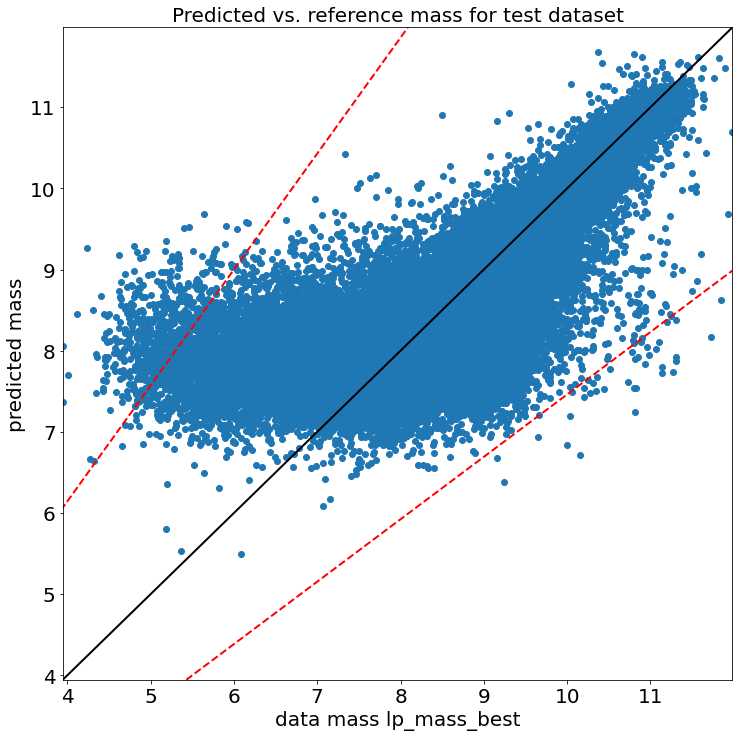

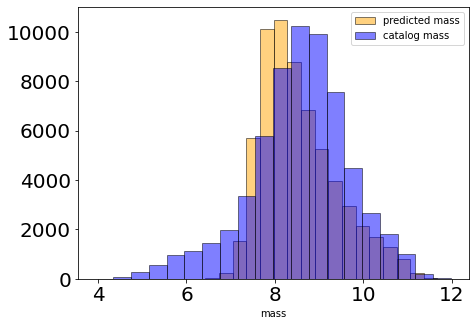

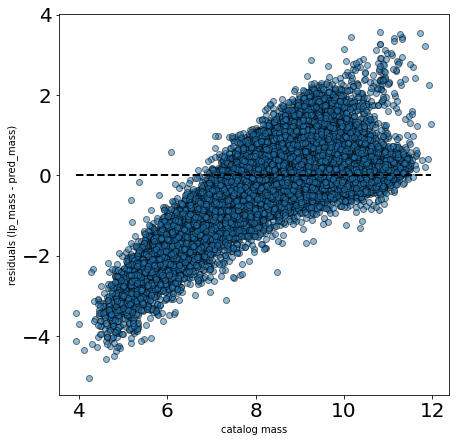

In [18]:
#Test:

model = catboost.CatBoostRegressor(n_estimators = 150, max_depth = 9, verbose = 0)
model.fit(x_train, y_train, sample_weight = x_err_train) # sample_weight = x_err_train
pred_z = model.predict(x_test)
#Metrics:
outlier_fraction, nmad, bias, r2 = metric_scores_rgr(y_test, pred_z)
print("Outlier fraction: \n", outlier_fraction)
print("\n Bias: \n", bias)
print("\n NMAD score: \n", nmad)
print('\n R2 Test: \n', r2)

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.scatter(y_test, pred_z)
plt.title('Predicted vs. reference mass for test dataset', fontsize = 20)
plt.xlabel('data mass lp_mass_best', fontsize = 20)
plt.ylabel('predicted mass', fontsize = 20)
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = np.min(y_test), np.max(y_test)
plt.xlim(np.min(y_test), np.max(y_test))
plt.ylim(np.min(y_test), np.max(y_test))
plt.plot([np.min(y_test)-0.3*(1+np.min(y_test)), np.max(y_test)-0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([np.min(y_test)+0.3*(1+np.min(y_test)), np.max(y_test)+0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2)


# Histogram:
fig_hist = plt.figure(figsize=(7,5))
plt.hist(pred_z, 20,facecolor='orange', edgecolor = 'black', alpha=0.5, label = 'predicted mass')
plt.hist(y_test, 20, facecolor='blue', edgecolor = 'black', alpha=0.5, label = 'catalog mass')
plt.xlabel('mass')
plt.legend()
# Residuals:
residuals = y_test - pred_z
fig_res = plt.figure(figsize=(7,7))
plt.scatter(y_test, residuals, alpha = 0.5, edgecolor = 'black')
plt.xlabel('catalog mass')
plt.ylabel('residuals (lp_mass - pred_mass)')
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = 0, 0
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2, linestyle = 'dashed')

In [ ]:
# Feature importance:
def plot_feature_importance(importance,names,model_type):
    """Plots feature importance
    importance: features importance output from model
    names: features names
    model_type: name of the model used to compute features importance
    """

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

features_importances = model.feature_importances_ #replace model by your model
names = np.array(['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3'])#list of the columns from the X_train data set
model_type = 'CatBoost' # change according to the model to be used. Only used in the plots.

plot_feature_importance(features_importances,names,model_type)

# SFR

In [19]:
#Group columns into features (x) and labels (y), with their errors:
y = data[['lp_zBEST', 'lp_age', 'lp_dust', 'lp_mass_best', 'lp_SFR_best']].copy()
x = data[['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()
y_z_err = data[['lp_chi2_best']].copy()
x_err = data[['HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3']].copy()

#Train validation test split:
x_train, x_testval, y_train, y_testval, x_err_train, x_err_testval = train_test_split(x, y, x_err, test_size=0.3, shuffle = True)
x_test, x_val, y_test, y_val , x_err_test, x_err_val = train_test_split(x_testval, y_testval, x_err_testval, test_size=0.5, shuffle = True)

In [20]:
y_train = y_train['lp_SFR_best'] #SFR
y_val = y_val['lp_SFR_best']
y_test = y_test['lp_SFR_best']

In [21]:
start = time.time()

def metric_scores_rgr(x,y):
    """Computes the NMAD, bias, outlier fraction for the regression tasks
    x: ground-truth data
    y: predicted data
    """
    met = np.abs(pd.Series(y-x))
    f_out = met/(1+x.astype(np.float32))
    nmad=1.48*np.median(f_out)
    bias = np.median(f_out)
    #y_outlier = pd.Series(np.where(f_out > 0.30, 'outlier', 'not outlier'))
    r2 = sklearn.metrics.r2_score(x, y)
    #print("Outliers: \n", y_outlier.value_counts())
    #outlier_fraction = y_outlier.value_counts()['outlier'] / len(y_outlier)
    #print("Outlier fraction: \n", outlier_fraction)
    #print("\n Bias: \n", bias)
    #print("\n NMAD score: \n", nmad)
    #print('\n R2 Test: \n', r2)
    return nmad, bias, r2


metrics = {'n_estimators': [], 'max_depth': [], 'NMAD': [], 'bias': [], 'r2': []}
metrics = pd.DataFrame(data=metrics)
for i in [50, 100, 150]:
    for j in [0, 4, 7, 9]:
        metrics['n_estimators']
        model = catboost.CatBoostRegressor(n_estimators = i, max_depth = j, verbose = 0)
        model.fit(x_train, y_train) # sample_weight = x_err_train
        pred_z = model.predict(x_val)
        # Tests for metric tuning:
        nmad, bias, r2 = metric_scores_rgr(y_val, pred_z)
        new_row = pd.DataFrame([[i, j, nmad, bias, r2]], columns=['n_estimators', 'max_depth', 'NMAD', 'bias', 'r2'])
        metrics = pd.concat([metrics, new_row], axis = 0)
        
print(metrics)

total_time = (time.time() - start)
print(f'Total needed time for catboost: {total_time/60} minutes')

   n_estimators  max_depth      NMAD      bias        r2
0          50.0        0.0  0.698188  0.471749 -0.000014
0          50.0        4.0  0.404932  0.273603  0.230638
0          50.0        7.0  0.380713  0.257239  0.245289
0          50.0        9.0  0.370762  0.250515  0.257595
0         100.0        0.0  0.698188  0.471749 -0.000014
0         100.0        4.0  0.386898  0.261418  0.244763
0         100.0        7.0  0.369637  0.249755  0.256235
0         100.0        9.0  0.357870  0.241804  0.257006
0         150.0        0.0  0.698188  0.471749 -0.000014
0         150.0        4.0  0.381125  0.257517  0.250485
0         150.0        7.0  0.363196  0.245403  0.248500
0         150.0        9.0  0.347154  0.234564  0.250073
Total needed time for catboost: 2.067827065785726 minutes



 Bias: 
 0.23235139512068925

 NMAD score: 
 0.3438800647786201

 R2 Test: 
 0.24941667354687103


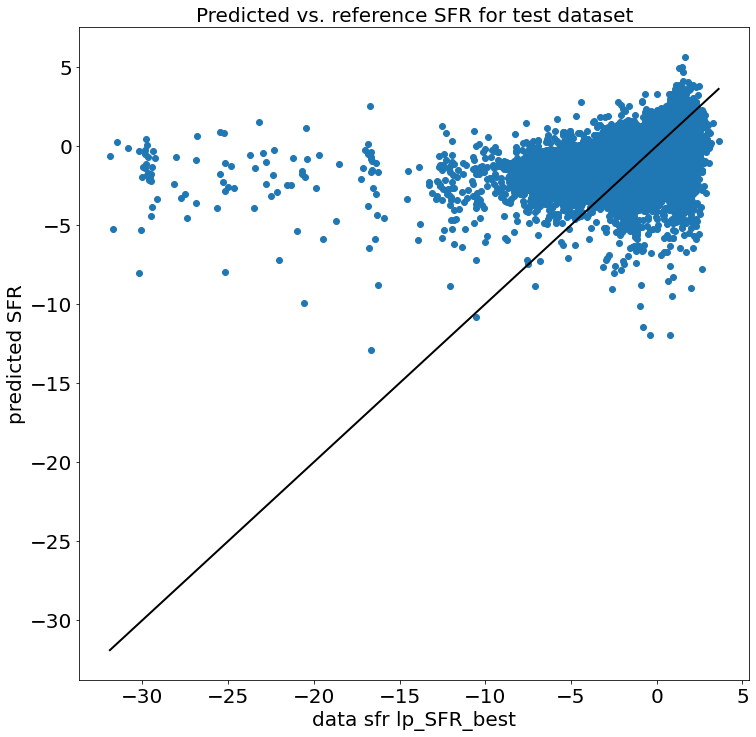

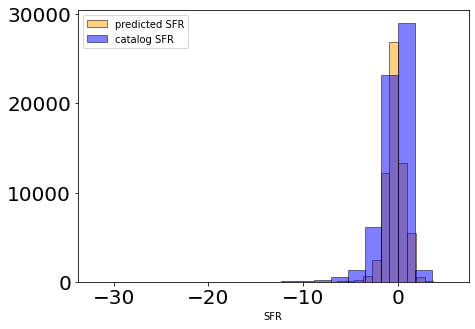

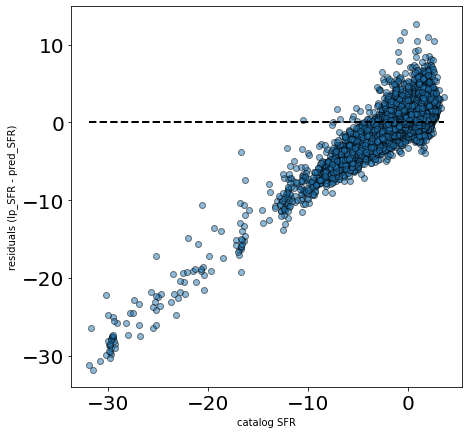

In [22]:
#Test:

model = catboost.CatBoostRegressor(n_estimators = 150, max_depth = 9, verbose = 0)
model.fit(x_train, y_train) # sample_weight = x_err_train
pred_z = model.predict(x_test)
#Metrics:
nmad, bias, r2 = metric_scores_rgr(y_test, pred_z)
print("\n Bias: \n", bias)
print("\n NMAD score: \n", nmad)
print('\n R2 Test: \n', r2)

plt.figure(figsize=(12,12))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.scatter(y_test, pred_z)
plt.title('Predicted vs. reference SFR for test dataset', fontsize = 20)
plt.xlabel('data sfr lp_SFR_best', fontsize = 20)
plt.ylabel('predicted SFR', fontsize = 20)
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = np.min(y_test), np.max(y_test)
#plt.plot([np.min(y_test)-0.3*(1+np.min(y_test)), np.max(y_test)-0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
#plt.plot([np.min(y_test)+0.3*(1+np.min(y_test)), np.max(y_test)+0.30*(np.max(y_test)+1)], [y0, y1], color = 'red', linewidth = 2, linestyle = 'dashed')
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2)


# Histogram:
fig_hist = plt.figure(figsize=(7,5))
plt.hist(pred_z, 20,facecolor='orange', edgecolor = 'black', alpha=0.5, label = 'predicted SFR')
plt.hist(y_test, 20, facecolor='blue', edgecolor = 'black', alpha=0.5, label = 'catalog SFR')
plt.xlabel('SFR')
plt.legend()
# Residuals:
residuals = y_test - pred_z
fig_res = plt.figure(figsize=(7,7))
plt.scatter(y_test, residuals, alpha = 0.5, edgecolor = 'black')
plt.xlabel('catalog SFR')
plt.ylabel('residuals (lp_SFR - pred_SFR)')
x0, x1 = np.min(y_test), np.max(y_test)
y0, y1 = 0, 0
plt.plot([x0, x1], [y0, y1], color = 'black', linewidth = 2, linestyle = 'dashed')

In [ ]:
# Feature importance:
def plot_feature_importance(importance,names,model_type):
    """Plots feature importance
    importance: features importance output from model
    names: features names
    model_type: name of the model used to compute features importance
    """

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,20))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

features_importances = model.feature_importances_ #replace model by your model
names = np.array(['HSC_g_FLUX_APER3', 'HSC_r_FLUX_APER3', 'HSC_i_FLUX_APER3',
                 'HSC_z_FLUX_APER3', 'HSC_y_FLUX_APER3', 'UVISTA_Y_FLUX_APER3',
                 'UVISTA_J_FLUX_APER3', 'UVISTA_H_FLUX_APER3', 'UVISTA_Ks_FLUX_APER3',
                 'SC_IB427_FLUX_APER3', 'SC_IB464_FLUX_APER3', 'SC_IA484_FLUX_APER3',
                 'SC_IB505_FLUX_APER3', 'SC_IA527_FLUX_APER3', 'SC_IB574_FLUX_APER3', 
                 'SC_IA624_FLUX_APER3', 'SC_IA679_FLUX_APER3', 'SC_IB709_FLUX_APER3', 
                 'SC_IA738_FLUX_APER3', 'SC_IA767_FLUX_APER3', 'SC_IB827_FLUX_APER3', 
                 'SC_NB711_FLUX_APER3', 'SC_NB816_FLUX_APER3', 'UVISTA_NB118_FLUX_APER3', 
                 'SC_B_FLUX_APER3', 'SC_gp_FLUX_APER3', 'SC_V_FLUX_APER3', 'SC_rp_FLUX_APER3', 
                 'SC_ip_FLUX_APER3', 'SC_zp_FLUX_APER3', 'SC_zpp_FLUX_APER3', 'HSC_g_FLUXERR_APER3', 'HSC_r_FLUXERR_APER3', 'HSC_i_FLUXERR_APER3',
                 'HSC_z_FLUXERR_APER3', 'HSC_y_FLUXERR_APER3', 'UVISTA_Y_FLUXERR_APER3',
                 'UVISTA_J_FLUXERR_APER3', 'UVISTA_H_FLUXERR_APER3', 'UVISTA_Ks_FLUXERR_APER3',
                 'SC_IB427_FLUXERR_APER3', 'SC_IB464_FLUXERR_APER3', 'SC_IA484_FLUXERR_APER3',
                 'SC_IB505_FLUXERR_APER3', 'SC_IA527_FLUXERR_APER3', 'SC_IB574_FLUXERR_APER3', 
                 'SC_IA624_FLUXERR_APER3', 'SC_IA679_FLUXERR_APER3', 'SC_IB709_FLUXERR_APER3', 
                 'SC_IA738_FLUXERR_APER3', 'SC_IA767_FLUXERR_APER3', 'SC_IB827_FLUXERR_APER3', 
                 'SC_NB711_FLUXERR_APER3', 'SC_NB816_FLUXERR_APER3', 'UVISTA_NB118_FLUXERR_APER3', 
                 'SC_B_FLUXERR_APER3', 'SC_gp_FLUXERR_APER3', 'SC_V_FLUXERR_APER3', 'SC_rp_FLUXERR_APER3', 
                 'SC_ip_FLUXERR_APER3', 'SC_zp_FLUXERR_APER3', 'SC_zpp_FLUXERR_APER3'])#list of the columns from the X_train data set
model_type = 'CatBoost' # change according to the model to be used. Only used in the plots.

plot_feature_importance(features_importances,names,model_type)